In [14]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Definir la función OR
def logical_or(x):
    return int(x[0] or x[1])

In [4]:
# Crear datos de entrenamiento y prueba
# Datos de entrada (bits): 0, 1
inputs = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
# Datos de salida (resultados de la función OR): 0, 1, 1, 1
labels = torch.tensor([[0], [1], [1], [1]], dtype=torch.float32)

In [5]:
# Definir la red neuronal
class SigmoidOR(nn.Module):
    def __init__(self):
        super(SigmoidOR, self).__init__()
        self.fc = nn.Linear(2, 1)
    
    def forward(self, x):
        x = torch.sigmoid(self.fc(x))
        return x

In [6]:
# Crear una instancia de la red neuronal
sigmoid_or = SigmoidOR()

# Definir la función de pérdida y el optimizador
criterion = nn.BCELoss()
optimizer = optim.SGD(sigmoid_or.parameters(), lr=0.1)


In [11]:
# Entrenar la red neuronal
for epoch in range(100000):
    optimizer.zero_grad()
    outputs = sigmoid_or(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    if epoch % 1000 == 0:
        print(f'Epoch [{epoch+1}/10000], Loss: {loss.item():.4f}')

Epoch [1/10000], Loss: 0.0093
Epoch [1001/10000], Loss: 0.0084
Epoch [2001/10000], Loss: 0.0077
Epoch [3001/10000], Loss: 0.0071
Epoch [4001/10000], Loss: 0.0066
Epoch [5001/10000], Loss: 0.0062
Epoch [6001/10000], Loss: 0.0058
Epoch [7001/10000], Loss: 0.0054
Epoch [8001/10000], Loss: 0.0051
Epoch [9001/10000], Loss: 0.0048
Epoch [10001/10000], Loss: 0.0046
Epoch [11001/10000], Loss: 0.0044
Epoch [12001/10000], Loss: 0.0042
Epoch [13001/10000], Loss: 0.0040
Epoch [14001/10000], Loss: 0.0038
Epoch [15001/10000], Loss: 0.0037
Epoch [16001/10000], Loss: 0.0035
Epoch [17001/10000], Loss: 0.0034
Epoch [18001/10000], Loss: 0.0033
Epoch [19001/10000], Loss: 0.0032
Epoch [20001/10000], Loss: 0.0030
Epoch [21001/10000], Loss: 0.0029
Epoch [22001/10000], Loss: 0.0029
Epoch [23001/10000], Loss: 0.0028
Epoch [24001/10000], Loss: 0.0027
Epoch [25001/10000], Loss: 0.0026
Epoch [26001/10000], Loss: 0.0025
Epoch [27001/10000], Loss: 0.0025
Epoch [28001/10000], Loss: 0.0024
Epoch [29001/10000], Loss: 

In [9]:
#Imprimir los resultados de la predicción
with torch.no_grad():
    predicted = sigmoid_or(inputs)
    predicted = np.round(predicted.numpy()) # Redondear a 0 o 1
    for i in range(len(inputs)):
        print(f'Entrada: {inputs[i].tolist()}, Predicción: {predicted[i].item()}')

Entrada: [0.0, 0.0], Predicción: 0.0
Entrada: [0.0, 1.0], Predicción: 1.0
Entrada: [1.0, 0.0], Predicción: 1.0
Entrada: [1.0, 1.0], Predicción: 1.0


In [13]:
# Imprimir todos los parámetros de la red neuronal
print("Parámetros de la red neuronal:")
for name, param in sigmoid_or.named_parameters():
    print(f'Nombre del parámetro: {name}, Valor: {param}')

Parámetros de la red neuronal:
Nombre del parámetro: fc.weight, Valor: Parameter containing:
tensor([[13.5223, 13.5223]], requires_grad=True)
Nombre del parámetro: fc.bias, Valor: Parameter containing:
tensor([-6.3024], requires_grad=True)


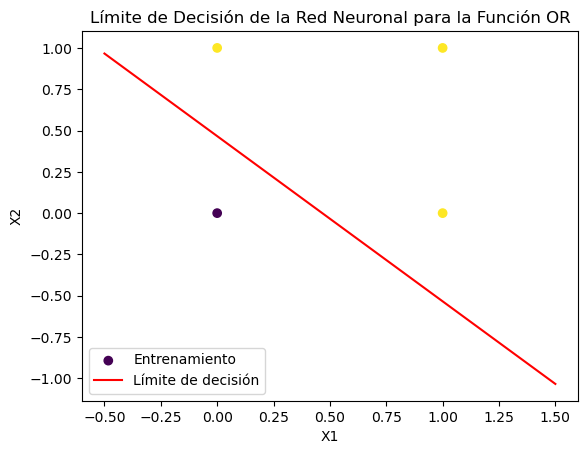

In [16]:
# Obtener los límites de decisión
w = sigmoid_or.fc.weight.detach().numpy().flatten()
b = sigmoid_or.fc.bias.detach().numpy().flatten()
x1 = np.linspace(-0.5, 1.5, 100)
x2 = (-b - w[0] * x1) / w[1]

# Graficar los puntos de entrenamiento
plt.scatter(inputs[:, 0], inputs[:, 1], c=labels[:, 0], cmap='viridis', label='Entrenamiento')
# Graficar el límite de decisión
plt.plot(x1, x2, '-r', label='Límite de decisión')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.title('Límite de Decisión de la Red Neuronal para la Función OR')
plt.show()